# WA State Wildfire List

2008 - Present, 13,391 rows.
Each row contains the info about 1 distinct wildfire, where it started, cause, etc. . . 

# Importing Libraries:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Plots and Graphs:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

import geopandas as gpd
import folium 

import requests
from IPython.display import Image, display

# Importing Data:

In [2]:
df = pd.read_csv('DNR_Fire_Statistics_2008_-_Present.csv')

In [3]:
df.head()

,X,Y,OBJECTID,FIREEVENT_ID,INCIDENT_NO,INCIDENT_NM,INCIDENT_ID,COUNTY_LABEL_NM,FIRE_TWP_WHOLE_NO,FIRE_TWP_FRACT_NO,FIRE_RGE_WHOLE_NO,FIRE_RGE_FRACT_NO,FIRE_RGE_DIR_FLG,FIRE_SECT_NO,SITE_ELEV,FIREGCAUSE_LABEL_NM,FIRESCAUSE_LABEL_NM,BURNESCAPE_RSN_LABEL_NM,ACRES_BURNED,START_DT,START_TM,DSCVR_DT,DSCVR_TM,CONTROL_DT,CONTROL_TM,FIRE_OUT_DT,FIRE_OUT_TM,BURN_MERCH_AREA,BURN_REPROD_AREA,BURN_NONSTOCK_AREA,FIREEVNT_CLASS_CD,FIREEVNT_CLASS_LABEL_NM,SECTION_SUBDIV_PTS_ID,LAT_COORD,LON_COORD,RES_ORDER_NO,NON_DNR_RES_ORDER_NO,START_OWNER_AGENCY_NM,START_JURISDICTION_AGENCY_NM,PROTECTION_TYPE,REGION_NAME
0,-1.333567e+07,6.191981e+06,1,49996,26,LITTLE PEACOCK,49829,OKANOGAN,35,0,24,0,E,26,2927.0,Recreation,Camper,NaN,0.01,2017/05/28 08:00:00+00,1800,2017/05/29 00:00:00+00,1335.0,2017/05/29 00:00:00+00,1420.0,2017/06/21 00:00:00+00,1328.0,NaN,NaN,NaN,1,Classified,662491,48.509150,-119.796370,NaN,NaN,DNR,DNR,DNR Protection FFPA,NORTHEAST
1,-1.346035e+07,5.765132e+06,2,50035,7,Turkey Ranch,49868,KLICKITAT,5,0,15,0,E,22,2000.0,Debris Burn,None,Extinguish,0.25,2017/05/23 08:00:00+00,1715,2017/05/23 00:00:00+00,1650.0,2017/05/23 00:00:00+00,1935.0,2017/05/25 00:00:00+00,1300.0,NaN,NaN,0.25,1,Classified,372894,45.904947,-120.916377,WA-SES-050,NaN,Private,DNR,DNR Protection FFPA,SOUTHEAST
2,-1.364323e+07,5.913875e+06,4,5021,90,1050 Fire,5163,THURSTON,16,0,2,0,E,33,350.0,Lightning,None,NaN,9.68,2008/08/17 08:00:00+00,300,2008/08/17 00:00:00+00,300.0,2008/08/17 00:00:00+00,1210.0,2008/09/15 00:00:00+00,1500.0,NaN,9.68,NaN,1,Classified,435486,46.826950,-122.559250,WA-PCS-0090,NaN,Private,DNR,DNR Protection FFPA,PACIFIC CASC
3,-1.306397e+07,6.094150e+06,5,7882,104,BEAR LAKE,8024,SPOKANE,28,0,43,0,E,15,1800.0,Lightning,None,NaN,0.10,2009/06/17 08:00:00+00,2015,2009/06/17 00:00:00+00,2030.0,2009/06/18 00:00:00+00,1221.0,2009/07/02 00:00:00+00,1234.0,0.1,NaN,NaN,1,Classified,552562,47.923560,-117.355620,NaN,NaN,Other Government,DNR,DNR Protection FFPA,NORTHEAST
4,-1.368587e+07,5.932888e+06,6,47157,68,HWY 101,46930,THURSTON,17,0,2,0,W,21,170.0,Recreation,Camper,NaN,0.01,2016/07/25 08:00:00+00,1730,2016/07/25 00:00:00+00,1730.0,2016/07/25 00:00:00+00,1815.0,2016/07/26 00:00:00+00,1530.0,NaN,NaN,NaN,1,Classified,560860,46.943690,-122.942240,WA-SPS-0097,NaN,Private,DNR,DNR Protection FFPA,SO PUGET


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13379 entries, 0 to 13378
Data columns (total 41 columns):
X                               13379 non-null float64
Y                               13379 non-null float64
OBJECTID                        13379 non-null int64
FIREEVENT_ID                    13379 non-null int64
INCIDENT_NO                     13379 non-null int64
INCIDENT_NM                     13379 non-null object
INCIDENT_ID                     13379 non-null int64
COUNTY_LABEL_NM                 13379 non-null object
FIRE_TWP_WHOLE_NO               13379 non-null int64
FIRE_TWP_FRACT_NO               13379 non-null int64
FIRE_RGE_WHOLE_NO               13379 non-null int64
FIRE_RGE_FRACT_NO               13379 non-null int64
FIRE_RGE_DIR_FLG                13379 non-null object
FIRE_SECT_NO                    13379 non-null int64
SITE_ELEV                       12176 non-null float64
FIREGCAUSE_LABEL_NM             13379 non-null object
FIRESCAUSE_LABEL_NM             1

## Column Descriptions:

__Column:__

- __X:__                            
- __Y:__                              
- __OBJECTID:__ Unique ID
- __FIREEVENT_ID:__ Unique ID
- __INCIDENT_NO:__ Incident Number
- __INCIDENT_NM:__ Incident Name (trail or forest area)
- __INCIDENT_ID:__ 
- __COUNTY_LABEL_NM:__ County Name (King, Stevens, etc. . .)          
- __FIRE_TWP_WHOLE_NO:__ 
- __FIRE_TWP_FRACT_NO:__
- __FIRE_RGE_WHOLE_NO:__
- __FIRE_RGE_FRACT_NO:__
- __FIRE_RGE_DIR_FLG:__
- __FIRE_SECT_NO:__
- __SITE_ELEV:__ Elevation of site
- __FIREGCAUSE_LABEL_NM:__ Cause
- __FIRESCAUSE_LABEL_NM:__ Secondary cause
- __BURNESCAPE_RSN_LABEL_NM:__
- __ACRES_BURNED:__ Acres Burned
- __START_DT:__ Start Date
- __START_TM:__ Start Time
- __DSCVR_DT:__ Discovery Date
- __DSCVR_TM:__ Discovery Time
- __CONTROL_DT:__ Date brought under control
- __CONTROL_TM:__ Time brought under control
- __FIRE_OUT_DT:__ Date fire was put out
- __FIRE_OUT_TM:__ Time fire was put out
- __BURN_MERCH_AREA:__
- __BURN_REPROD_AREA:__
- __BURN_NONSTOCK_AREA:__
- __FIREEVNT_CLASS_CD:__
- __FIREEVNT_CLASS_LABEL_NM:__ 'Classified' or 'Other Agency'
- __SECTION_SUBDIV_PTS_ID:__ 
- __LAT_COORD:__ Longitude
- __LON_COORD:__ Latitude
- __RES_ORDER_NO:__  
- __NON_DNR_RES_ORDER_NO:__ 
- __START_OWNER_AGENCY_NM:__ Owner of land where fire started (private, government, DNR, etc. . .)
- __START_JURISDICTION_AGENCY_NM:__ Jurisdiction where it started
- __PROTECTION_TYPE:__ Type of Protection of area
- __REGION_NAME:__  Region

In [5]:
print('Latitude Range: ', min(df.LAT_COORD), ' - ', max(df.LAT_COORD))
print('Longitude Range: ', min(df.LON_COORD), ' - ', max(df.LON_COORD))

Latitude Range:  45.557811  -  48.999629999999996
Longitude Range:  -124.66326000000001  -  -116.94345700000001


# Test Zone:

Choosing only the first 10 rows with limited info in order to sort out collecting satellite imagery.

In [6]:
# Selecting columns
df_test = df[['INCIDENT_NM', 'START_DT', 'ACRES_BURNED', 'LAT_COORD', 'LON_COORD']]

# Renaming columns
df_test.rename(columns={"INCIDENT_NM": "name",
                        "START_DT": "date",
                        "ACRES_BURNED": "acres", 
                        "LAT_COORD": "lat",
                        "LON_COORD": "lon"}, inplace = True)

# Formatting the date
df_test['date'] = pd.to_datetime(df_test.date)
df_test.date = df_test.date.dt.strftime('%m/%d/%Y')
df_test['date'] = pd.to_datetime(df_test.date)

# Rounding coordinates to 6 places:
df_test['lat'] = df_test['lat'].map(lambda x: round(x, 6))
df_test['lon'] = df_test['lon'].map(lambda x: round(x, 6))

# For center coordinates in the URL
df_test['lat'] = df_test['lat'].map(lambda x: str(x))
df_test['lon'] = df_test['lon'].map(lambda x: str(x))
df_test['center'] = df_test[['lat', 'lon']].agg(','.join, axis=1)

# Setting it to only 10 rows
df_test = df_test[:10]
# Showing the dataframe
df_test

,name,date,acres,lat,lon,center
0,LITTLE PEACOCK,2017-05-28,0.01,48.50915,-119.79637,"48.50915,-119.79637"
1,Turkey Ranch,2017-05-23,0.25,45.904947,-120.916377,"45.904947,-120.916377"
2,1050 Fire,2008-08-17,9.68,46.82695,-122.55925,"46.82695,-122.55925"
3,BEAR LAKE,2009-06-17,0.10,47.92356,-117.35562,"47.92356,-117.35562"
4,HWY 101,2016-07-25,0.01,46.94369,-122.94224,"46.94369,-122.94224"
5,HUNGRY HOLLOW,2011-10-31,0.11,48.89118,-119.12969,"48.89118,-119.12969"
6,LAMBERT,2016-03-22,2.00,48.76763,-118.62872,"48.76763,-118.62872"
7,SILVER LAKE,2016-08-27,0.18,47.55277,-117.63152,"47.55277,-117.63152"
8,HOYER,2020-07-27,0.10,46.25529,-122.89901,"46.25529,-122.89901"
9,MERRY CLARK,2017-08-03,0.01,48.044543,-124.276721,"48.044543,-124.276721"


Goal: Use folium or geopy or similar library to run through all these coordinates and save an appropriately sized image to my drive.

In [7]:
#folium.Map([47.923560, -120.916377], zoom_start=15)


Next steps:
- Use Google Static Maps API to get the satellite data
- link [here](https://stackoverflow.com/questions/9087166/how-can-i-extract-a-satellite-image-from-google-maps-given-a-lat-long-rectangle)

## Setting Default Params:

In [8]:
img_size = '640x640' # Let's try this for now.  Gets multiplied by scale for resolution
# 400x400 might be plenty.  We should definitely try to pare this down
# 30k 400x400 images would be 2 gigs in png format
img_format = 'jpg' # For compressability (is that a word?) png is 'png8' for 8 bit and 'png32' for 32 bit
map_scale = 1 # For scale parameter.  should get about 640 by 640
maptype = 'satellite' # Obvious reason
zoom = 12 # try that to start

## Collecting API Key:

In [9]:
key = open('/Users/Thomas/Desktop/google_api/gmap_api_key.txt', 'r').read()

## Crafting the URL:

Should show the Little Peacock location [here](https://www.google.com/maps/place/48%C2%B030'32.9%22N+119%C2%B047'46.9%22W/@48.5071029,-119.8285136,13z/data=!4m5!3m4!1s0x0:0x0!8m2!3d48.50915!4d-119.79637)

In [10]:
url_base = 'https://maps.googleapis.com/maps/api/staticmap?center=48.50915,-119.79637&zoom=12&size=400x400&key='
url = url_base + key

## Displaying the Image:

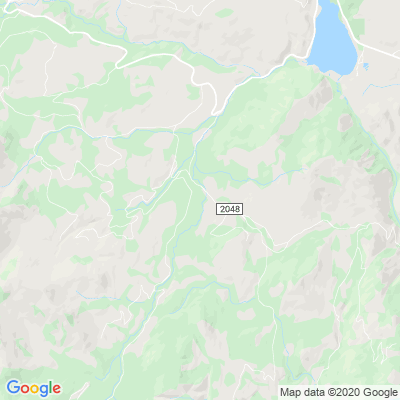

In [11]:
r = requests.get(url)
display(Image(r.content))